1314 unique labels

1. random split

2. split by k-means clustered

In [7]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
folder_path = "../data/"

In [4]:
train_values = pd.read_csv(folder_path+"train_values.csv")
train_labels = pd.read_csv(folder_path+"train_labels.csv")
test_values = pd.read_csv(folder_path+"test_values.csv")

In [8]:
train_values.head()

,sequence_id,sequence,bacterial_resistance_ampicillin,bacterial_resistance_chloramphenicol,bacterial_resistance_kanamycin,bacterial_resistance_other,bacterial_resistance_spectinomycin,copy_number_high_copy,copy_number_low_copy,copy_number_unknown,growth_strain_ccdb_survival,growth_strain_dh10b,growth_strain_dh5alpha,growth_strain_neb_stable,growth_strain_other,growth_strain_stbl3,growth_strain_top10,growth_strain_xl1_blue,growth_temp_30,growth_temp_37,growth_temp_other,selectable_markers_blasticidin,selectable_markers_his3,selectable_markers_hygromycin,selectable_markers_leu2,selectable_markers_neomycin,selectable_markers_other,selectable_markers_puromycin,selectable_markers_trp1,selectable_markers_ura3,selectable_markers_zeocin,species_budding_yeast,species_fly,species_human,species_mouse,species_mustard_weed,species_nematode,species_other,species_rat,species_synthetic,species_zebrafish
0,9ZIMC,CATGCATTAGTTATTAATAGTAATCAATTACGGGGTCATTAGTTCA...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5SAQC,GCTGGATGGTTTGGGACATGTGCAGCCCCGTCTCTGTATGGAGTGA...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,E7QRO,NNCCGGGCTGTAGCTACACAGGGCGGAGATGAGAGCCCTACGAAAG...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CT5FP,GCGGAGATGAAGAGCCCTACGAAAGCTGAGCCTGCGACTCCCGCAG...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7PTD8,CGCGCATTACTTCACATGGTCCTCAAGGGTAACATGAAAGTGATCC...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
train_labels.head()

,sequence_id,00Q4V31T,012VT4JK,028IO5W2,03GRNN7N,03Y3W51H,09MQV1TY,0A4AHRCT,0A9M05NC,0B9GCUVV,0CL7QVG8,0CML4B5I,0DTHTJLJ,0FFBBVE1,0HWCWFNU,0L3Y6ZB2,0M44GDO8,0MDYJM3H,0N3V9P9M,0NP55E93,0PJ91ZT6,0R296F9R,0T2AZBD6,0URA80CN,0VRP2DI6,0W6O08VX,0WHP4PPK,0XPTGGLP,0XS4FHP3,0Y24J5G2,10TEBWK2,11TTDKTM,131RRHBV,13LZE1F7,14PBN8C2,15D0Z97U,15S88O4Q,18C9J8EH,19CAUKJB,1AP294AT,1B9BJ2IP,1BE35FI1,1CIHYCE4,1DJ9L58E,1DTDCRUO,1EDZ6CA7,1HCQTAYT,1HK4VXP8,1IXFZ3HO,1K11RCST,1KC6XYO6,1KNFJ6KQ,1KZHNVYR,1LBGAU5Z,1NXRMDN6,1OQJ21E9,1OWZDF82,1PA232PA,1PIGWQFY,1Q1IUY3G,1S515B69,1TC200QC,1TI4HS4X,1UOA7CA1,1UREJUSJ,1UU0CHTK,1VPOX8VI,1VQS4WNS,1X0VC0O1,1XU60MET,1ZC8RPN1,20ABQYHS,20CEB9KE,216DWMG6,21ZFBX5E,24SL2992,25UVYUID,26KK8UM5,27OS3BTP,28D4D4QM,298AMR5C,29D6Q091,2AQG6I31,2BAFY4GP,2CJHRNWD,2FCX4O0X,2GGU2QA2,2GSZMU46,2GTLIT33,2H37WPKA,2HNZZYDB,2JPNC9X6,2KDACBQT,2L336TQL,2M3CXS8N,2MCB7LXW,2MQ2NPMA,2NEXWXMT,2PY8K6GU,2Q33W599,2SSVM7H9,2TVMHQTW,2TXY439E,2VP4JPB9,2VTLZHDS,2VX4F6RC,2XC1478M,2XX0N87I,2Y9L13L4,2YCH1PUI,2YLQA8OZ,303BN0Z0,318RH8P0,330L4OIV,33AR5KVE,343M819H,34TE1Q0A,35MKXPL0,36W150XW,36XLYYGZ,37VO60SB,384ASNLB,38MDETY1,38MEQ4SU,39LLQ2PB,39TEZ0C3,39TPBOL7,3BGLF8BC,3C2VZQ2R,3C952KY7,3D9CMQ4V,3EARN0Z7,3EYBG174,3EZXYI3U,3FPH0N6R,3FW33G68,3GEXBRC0,3KCEM7V4,3L314D8W,3LSNTL1N,3MDRJUI2,3MX1D3LD,3N169DM2,3NSJ6N02,3O1GIAV7,3QP4D23X,3RK54JUW,3TLD81QQ,3TUFYWQN,3TXFYNKG,3X2GGDHW,3XE0BJDW,3YAQWNBK,3YEGUN04,3YYEC52Y,40MD0YZ3,40ZI3TDN,443NZOSB,448QVC4C,44N2CYI9,459BZKP3,4648UZGD,46AZ97U9,48F0EUVN,49571DXY,49YZILWR,4CKAV3LS,4DGGCYVE,4DGMNDIC,4E7187A9,4GF31RCS,4GHCND6Z,4IADYZ8R,4IDTMY10,4J7KEYE2,4KSHU5M7,4LCFACE1,4LQ8L195,4M3XG8RC,4O39WLXM,4O5RQHEF,4PKCMX7O,4QK5ZDHA,4QU07FT7,4RCA1UZG,4RHLX089,4S1LIWGV,4TIT4L5F,4U5LAAN5,4VHMF1RI,4WAQ4VFB,4WRI77CU,4X2RTV2D,4Y4DT3SL,4ZYW54M8,50NBGIOB,52Y9GFGK,54C6PEBH,54ZFOPSF,558GIQ68,55HTZ7T0,579G0TJI,57FHO8YC,57NGF1YS,58BSUZQB,5ASQZ0OT,5AUVXXDU,5BNUT8AW,5BTY65G6,5CBNCRST,5FUDT1QA,5H71LUBY,5K2PTY6L,5KXWXV9G,5LH9NUMK,5OBD73W0,5OF7OYEA,5OFUVG9U,5PC2F8NE,5PR9OSRS,5Q9ETXJL,5QLBIUXN,5QY2HU8J,5SCOFTY2,5SGMS705,5V3Z108E,5W2PCT95,5X9VNAN3,5Z4CMIY5,5ZB8I3T0,5ZW05824,60HBQEP8,62PKSARW,638UYIQC,64FFXH4M,65CCBIXK,669R7ER0,66XSSS3Q,685KTH3G,68OY1RK5,69M351P4,6AT20D5S,6DBY872A,6E28DNQK,6KT0EAKX,6LQ0W02R,6NCTAA30,6NKNB308,6NULQ6KP,6PS2LHCV,...,T8R673OI,T9LSOTV6,T9ZHWQE9,TBJE6V15,TBUHVONI,TCKOTGYJ,TD593FIM,TE1TWCPZ,TFTOGJOD,TGPPSF7M,THD393NW,THW6JGC7,TI21BGNU,TIAPP57M,TJLVHJ87,TK932JM1,TKLYRWYO,TNR495LD,TQAA3UHV,TRM5SRRW,TTU1NVDI,TU2W2LCB,TUO2TVTX,TVQC1R4D,TWH1XFPL,TWV05PEP,TYJN7K7A,TYQ2T01H,TZ8JAEO6,TZL79DYX,U0U7F3EW,U2C1NG0D,U2C2VVY8,U2OZU4IY,U2VWRM3F,U2ZEEFLD,U3QRAT06,U47IUY9C,U49ISLNE,U5966IDO,U5ZJCLCX,U69N21WU,U6DS14AT,U6TNOS7M,U74I1JYB,U8FRHWSV,U8SWTHB5,UAY0HW9A,UBO7MS4D,UBWK5LJH,UBXL2EGE,UC094GDG,UCC4KYQL,UCVUALGM,UEZVPK90,UFAQZXPY,UFEO02VM,UFTYVG6Y,UH5Z524P,UHU62P41,UJNF3UO2,UJSK2U9A,UK4B4I7A,UKG1R822,ULOHU3PC,ULVU086L,UMDZG9XM,UMM76IOX,UMOD7PGG,UNAGKRY0,UNE947CO,UO4MVLJS,UP3750KB,UQUIUCVA,URO46KFW,URY1ZVZI,US8KF8X3,UVXQ3O4K,UWWS6RWO,UXK3D4GF,UYCX4ZJS,UYLJZRPN,UYPE34HA,V04Z48C3,V1YVL2DL,V3JDHWOB,V4A28VLV,V4RKPN30,V5C3CWTK,V6X2Z58S,V8MF2IKQ,VAGUTU8C,VB04AEHZ,VDSDXJ71,VDYHUCQB,VE48SF8D,VFCTUL5J,VFOEJ2CS,VGCXUCRO,VGWO9SBA,VHPX9GYO,VJU9EYFE,VKN3L279,VKU9G6Y5,VMU0L6UM,VO0ATBFS,VOT8OKU2,VRZZPHI4,VW6ZY2L1,VYW7T8YY,VZLS9GCK,W184Y53L,W1STLS0T,W2DYAZID,W7WRIFC0,W9QZOUW7,WAL364PD,WB78G3XF,WBGCVIO8,WD8MHX8N,WDNYZZHJ,WG42FGWA,WG7S6W2T,WHLUO40S,WK162QYQ,WK4NBYSB,WKRC8NSD,WKYJ6R7D,WL3FJI96,WL8VMHWG,WM3Q8LBC,WM9JWC4B,WNEX0Y1X,WP6H3E2T,WQ1DVVYG,WQBN4WGH,WRDZ1CVS,WSHPKJ3H,WTFS8JV2,WTYMIZ88,WUARWGNF,WUR2UJYP,WWDAZG6C,WX0HMR4F,WZX61W39,WZZLL8O4,X0VJJXGQ,X2PFPX2S,X4WO7LHO,X4YNMN9Z,X6497O49,X6LFEBK7,X920R0YN,X9RNN0YD,XCWSW5T9,XD80LQN2,XE4D68OI,XHQPAVRU,XLYFD8RW,XOEVMQZT,XP1SRNTB,XP5B8615,XPQ9IYZC,XR7GR7UE,XRENDLF1,XSA3Y2H6,XTKRJ8N6,XU8GASLQ,XV32YHEZ,XY9JOM6L,XYB5NWR4,Y060M6TK,Y324NGPN,Y3HA6UDE,Y4G53L4X,Y4X5JU76,Y575VUS1,Y5YH740Y,Y620TYKH,Y6EC9YQA,Y73L2QKM,Y81SHRRC,YCD71LRY,YCNWCC0Z,YCY2FFYZ,YDPNP1KR,YE9BU3J3,YEA0ZZZP,YEZ30YUQ,YFSGJUTL,YGFI5B9G,YGFIQ8SA,YHUR7HZ6,YHX25

In [16]:
label = train_labels.iloc[:, 1:].idxmax(axis=1)
df_label = pd.DataFrame({
    "sequence_id": train_labels.sequence_id,
    "label": label
})
df_label.head()

,sequence_id,label
0,9ZIMC,RYUA3GVO
1,5SAQC,RYUA3GVO
2,E7QRO,RYUA3GVO
3,CT5FP,RYUA3GVO
4,7PTD8,RYUA3GVO


<AxesSubplot:>

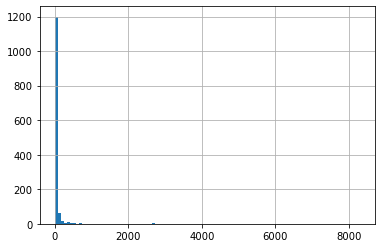

In [29]:
df_label.label.value_counts().hist(bins=100)

highly imbalanced..probably use clustering for stratification.

In [23]:
df_label.label.nunique()

1314